8.2.1 선 그래프

In [7]:
import pandas as pd
import numpy as np

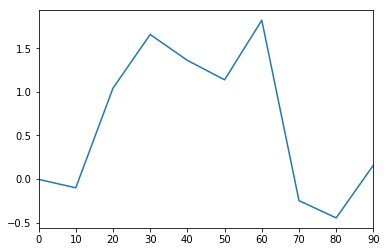

In [8]:
%matplotlib inline
s = pd.Series(np.random.randn(10).cumsum(), index = np.arange(0, 100, 10))
s.plot()

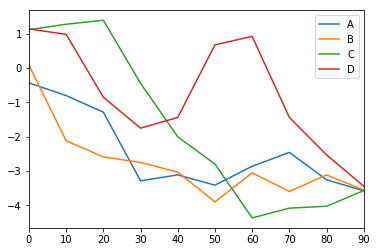

In [14]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
              columns=['A', 'B', 'C', 'D'],
              index=np.arange(0, 100, 10))
df.plot()

8.2.2 막대 그래프

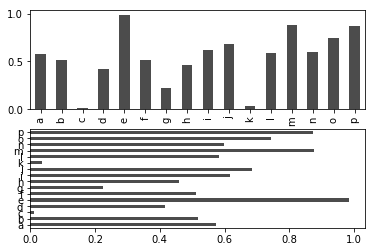

In [30]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

In [32]:
df = pd.DataFrame(np.random.rand(6,4),
                 index=['one', 'two', 'three', 'four', 'five', 'six'],
                 columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.821567,0.303892,0.518586,0.410086
two,0.554237,0.000638,0.956744,0.793046
three,0.369856,0.595024,0.108623,0.547661
four,0.992129,0.497422,0.801879,0.128694
five,0.448276,0.953990,0.664361,0.169335
six,0.965142,0.087968,0.197826,0.097955


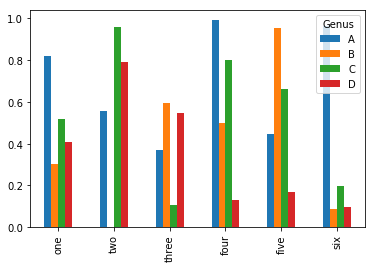

In [33]:
df.plot(kind='bar')

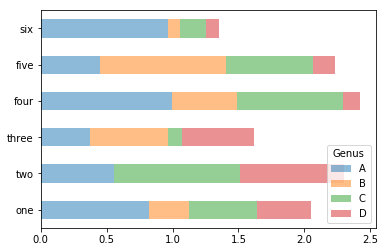

In [34]:
df.plot(kind='barh', stacked=True, alpha=0.5)

In [43]:
tips = pd.read_csv('tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [46]:
# 혼자거나 6명 규모의 파티는 제외한다
party_counts = party_counts.ix[:, 2:5]

C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


In [47]:
# 혼자거나 6명 규모의 파티는 제외한다
party_counts = party_counts.loc[:, 2:5]

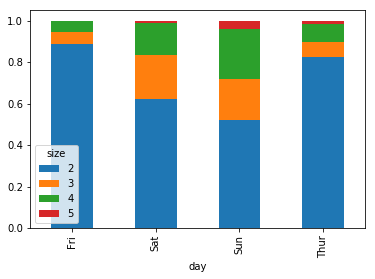

In [48]:
# 총합이 1이 되도록 정규화한다
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
party_pcts

party_pcts.plot(kind='bar', stacked=True)

8.2.3 히스토그램과 밀도 그래프

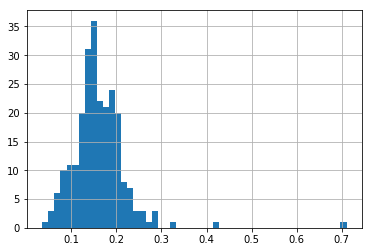

In [49]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

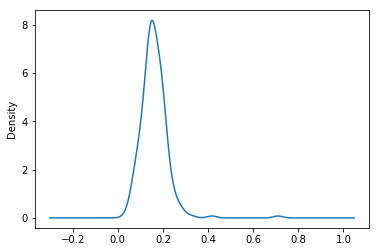

In [50]:
tips['tip_pct'].plot(kind='kde')

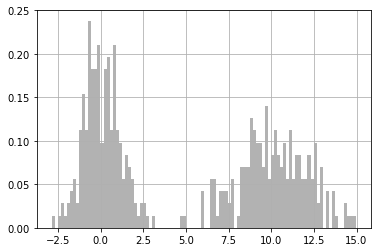

In [52]:
comp1 = np.random.normal(0, 1, size=200)  #N(0, 1)
comp2 = np.random.normal(10, 2, size=200)  #N(10,4)
values = pd.Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True)

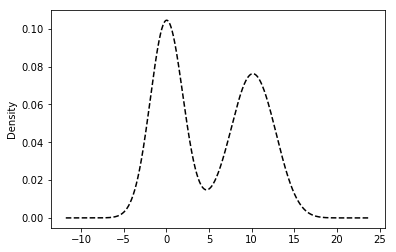

In [53]:
values.plot(kind='kde', style='k--')

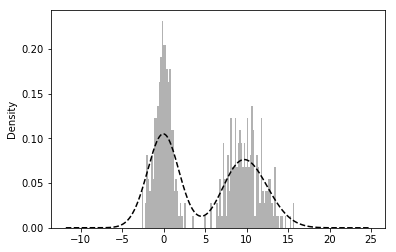

In [54]:
comp1 = np.random.normal(0, 1, size=200)  #N(0, 1)
comp2 = np.random.normal(10, 2, size=200)  #N(10,4)
values = pd.Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

8.2.4 산포도

In [57]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


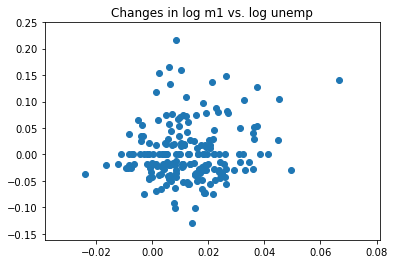

In [60]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002826C4CF3C8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002826CAE3E10>]], dtype=object)

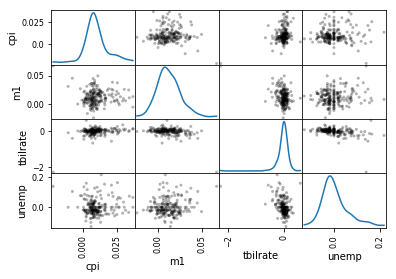

In [61]:
pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002826CC1F5F8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002826E1F20F0>]], dtype=object)

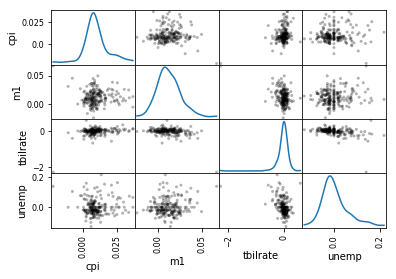

In [63]:
pd.plotting.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)